Welcome to the Descriptive Statistics Final Project! In this project, you will demonstrate what you have learned in this course by conducting an experiment dealing with drawing from a deck of playing cards and creating a writeup containing your findings. Be sure to check through the project rubric to self-assess and share with others who will give you feedback.

In the final project, you will demonstrate what you have learned in this course by conducting an experiment dealing with drawing from a deck of playing cards and creating a writeup containing your findings. If you are a student viewing the free courseware, you are welcome to complete this project but you will not submit your project for evaluation.


This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King).

You can use either a physical deck of cards for this experiment or you may use a virtual deck of cards such as that found on random.org (http://www.random.org/playing-cards/).

For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

<ol>
    <li>First, create a histogram depicting the relative frequencies of the card values.</li>
    <li>Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.</li>
    <li>Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.</li>
    <li>Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?</li>
    <li>Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
suits=['spades', 'hearts', 'diamonds', 'clubs']

In [3]:
card_values_dict={'Ace': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5, 'Six': 6, 'Seven': 7, 'Eight': 8, 'Nine': 9, 'Ten': 10, 'Jack': 10, 'Queen': 10, 'King': 10}

In [4]:
card_vals_df=pd.DataFrame(columns=['suit', 'card', 'value'])
for suit in suits:
    for key, val in card_values_dict.items():
        temp_dict={'suit': [suit], 'card': [key], 'value': [val]}
        card_vals_df=pd.concat([card_vals_df, pd.DataFrame.from_dict(temp_dict)], axis=0)

### 1. Plotting a histogram depicting the relative frequencies of the card values.

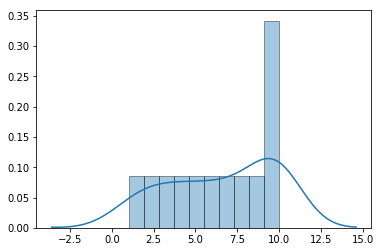

In [5]:
sns.distplot(list(card_vals_df['value']), hist_kws=dict(edgecolor="k", linewidth=1), bins=len(set(list(card_vals_df['value']))), norm_hist=True)

### 2. Sampling without replacement.

In [6]:
card_sums=[]
num_samples=100

In [7]:
for i in range(num_samples):
    card_vals_df=card_vals_df.sample(frac=1).reset_index(drop=True)
    card_samples=card_vals_df.sample(n=3, axis=0, replace=False)
    card_sums.append(card_samples['value'].sum())

### 3. Plotting the distribution of card sums.

If we increase the number of samples, the distribution will become more normally distributed. This is because of the central limit theorem.

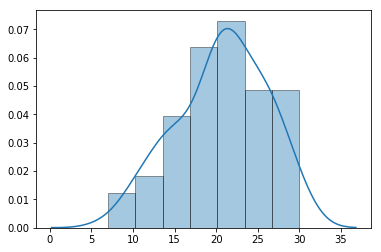

In [8]:
sns.distplot(card_sums, hist_kws=dict(edgecolor="k", linewidth=1))

### 4. Descriptive statistics for the samples we have drawn.

The Mean and Median are measures of centeral tendency. The Standard Deviation and IQR are measure of variability.

In [9]:
print(pd.Series(card_sums).describe())
print('median    {}'.format(pd.Series(card_sums).median()))

count    100.000000
mean      20.670000
std        5.365537
min        7.000000
25%       17.000000
50%       21.000000
75%       25.000000
max       30.000000
dtype: float64
median    21.0


### 5. Make some estimates about values you will get on future draws.

Since we want to get the range where we expect approximately 90% of your draw values to fall, we are going to get the z-score for 5% from the Z table and then use the z-score to get our range.

In [10]:
#z-score = (x-mu)/sigma
lower_z=-1.645
upper_z=1.645
lower_range=(lower_z*pd.Series(card_sums).std())+pd.Series(card_sums).mean()
upper_range=(upper_z*pd.Series(card_sums).std())+pd.Series(card_sums).mean()
print('90% of the draw values are expected to be in the range {0} ≤ x ≤ {1}'.format(lower_range, upper_range))

90% of the draw values are expected to be in the range 11.843691236342675 ≤ x ≤ 29.49630876365733


What is the approximate probability that you will get a draw value of at least 20?

In [11]:
z_val=(20-pd.Series(card_sums).mean())/pd.Series(card_sums).std()
z_val

-0.12487099981570425

In [12]:
'probability={}'.format(1-0.4522)

'probability=0.5478000000000001'